<img src="imgs\banner_fcd.jpg" alt="bannersp" width="1100"  height="150">

## <span style="color:#2F749F;"><strong>📦 Sesión práctica 4: Introducción a datos atípicos</strong></span>
---
<p align="right">
  <a href="https://github.com/mariabda2/intro_data_2025/blob/main/sesiones_practicas/sp_4_maria_bernarda_salazar.ipynb?clone=true" target="_blank">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Abrir en Colab"/>
  </a>
</p>


## <span style="color:black;"><strong>Datos del estudiante</strong></span>

Steven Alipio Berrio   cc: 1036661504

Juan Pablo Legarda   cc: 1061770674

# <span style="color:#2F749F;"><strong>Ejercicio 1: Intervalo IQR</strong></span>

A partir de siguiente código:

1. Ajusta el código para mejorar la interpretación de la gráfica. Mínimo debes:
   - Indicar los nombres de los ejes
   - Incluir legenda para comprender lo que esté incluído en la gráfica
2. Generar máximo 5 líneas de análisis sobre lo que observas en términos de defición de atípicos sobre tú gráfica final

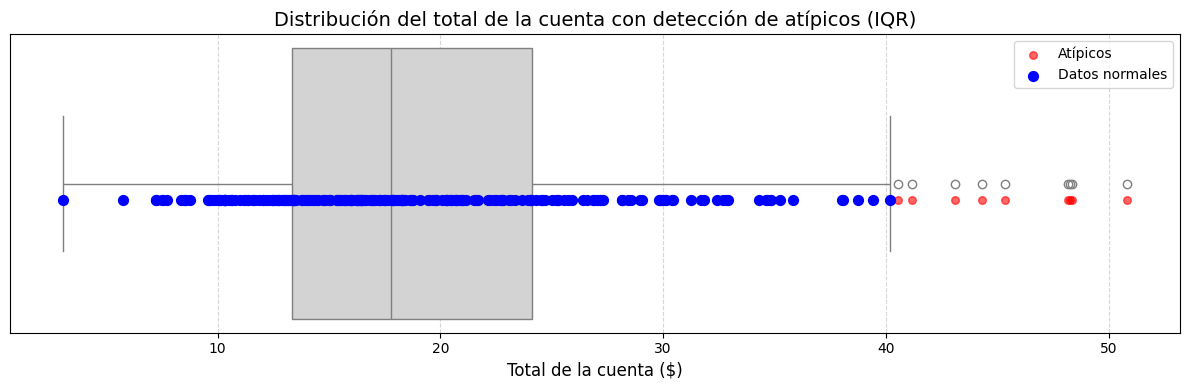

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


tips = sns.load_dataset("tips")
total_bill = tips["total_bill"].values
Q1, Q3 = np.percentile(total_bill, [25, 75])
IQR = Q3 - Q1
lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR
data_a = total_bill[(total_bill < lim_inf) | (total_bill > lim_sup)]
data_b = total_bill[(total_bill >= lim_inf) & (total_bill <= lim_sup)]

plt.figure(figsize=(12, 4))
sns.boxplot(x=total_bill, color="lightgray")

plt.scatter(data_a, [0.05]*len(data_a), color="red", s=30, alpha=0.6, label="Atípicos")
plt.scatter(data_b, [0.05]*len(data_b), color="blue", s=50, zorder=5, label="Datos normales")

# Etiquetas y leyenda
plt.xlabel("Total de la cuenta ($)", fontsize=12)
plt.title("Distribución del total de la cuenta con detección de atípicos (IQR)", fontsize=14)
plt.yticks([])
plt.legend(loc="upper right")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


La mayoría de los datos del total de la cuenta se concentran entre aproximadamente $13 y $30.

Los valores atípicos identificados están por encima del límite superior, en especial mayores a $45.

No se observan valores atípicos por debajo del límite inferior, lo que indica que las cuentas extremadamente bajas son raras.

La detección se basó en el método del IQR, que es robusto frente a distribuciones asimétricas.

Los atípicos podrían deberse a grupos grandes o consumo elevado, y deberían analizarse por separado.

# <span style="color:#2F749F;"><strong>Ejercicio 2: Graficos de dispersión</strong></span>

A partir de siguiente código:

1. Ajusta el código para mejorar la interpretación de la gráfica. Mínimo debes:
   - Indicar los nombres de los ejes
   - Incluir legenda para comprender lo que esté incluído en la gráfica
2. Generar máximo 5 líneas de análisis sobre lo que observas en términos de defición de atípicos sobre tú gráfica final

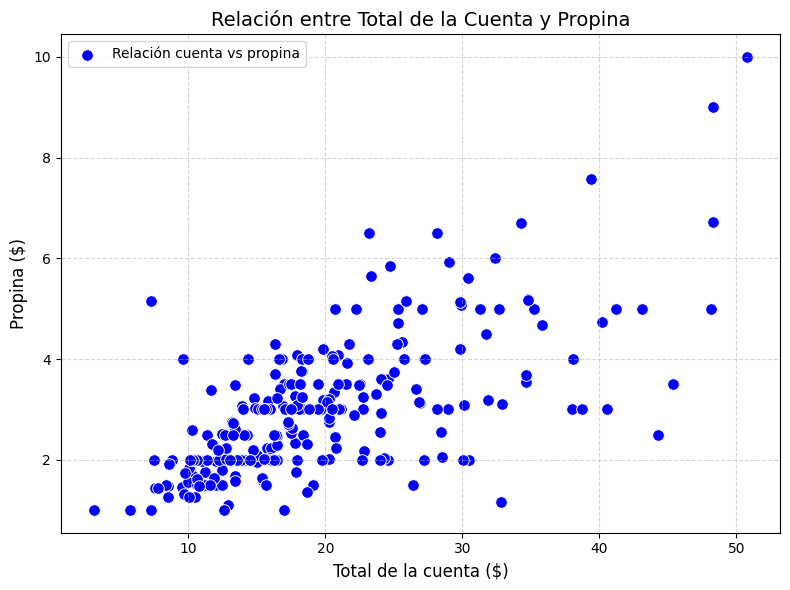

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


tips = sns.load_dataset("tips")

x = tips["total_bill"].values
y = tips["tip"].values

plt.figure(figsize=(8,6))
sns.scatterplot(x=x, y=y, s=70, color="blue", label="Relación cuenta vs propina")

# Etiquetas y leyenda
plt.xlabel("Total de la cuenta ($)", fontsize=12)
plt.ylabel("Propina ($)", fontsize=12)
plt.title("Relación entre Total de la Cuenta y Propina", fontsize=14)
plt.legend(loc="upper left")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


La gráfica muestra una correlación positiva: a mayor total de la cuenta, mayor tiende a ser la propina.

Se observan algunos puntos dispersos lejos del patrón general, que podrían considerarse atípicos.

Por ejemplo, propinas superiores a $9 con cuentas no tan altas podrían analizarse como valores extremos.

Estos posibles atípicos pueden estar influenciados por factores como la calidad del servicio o tamaño del grupo.

La mayoría de los datos se concentran en cuentas entre $10 y $30, con propinas entre $2 y $5.

# <span style="color:#2F749F;"><strong>Ejercicio 3: Histogramas y funciones de densidad</strong></span>

A partir de siguiente código:

1. Ajusta el código para mejorar la interpretación de la gráfica. Mínimo debes:
   - Indicar los nombres de los ejes
   - Incluir legenda para comprender lo que esté incluído en la gráfica
2. Generar máximo 5 líneas de análisis sobre lo que observas en términos de defición de atípicos sobre tú gráfica final

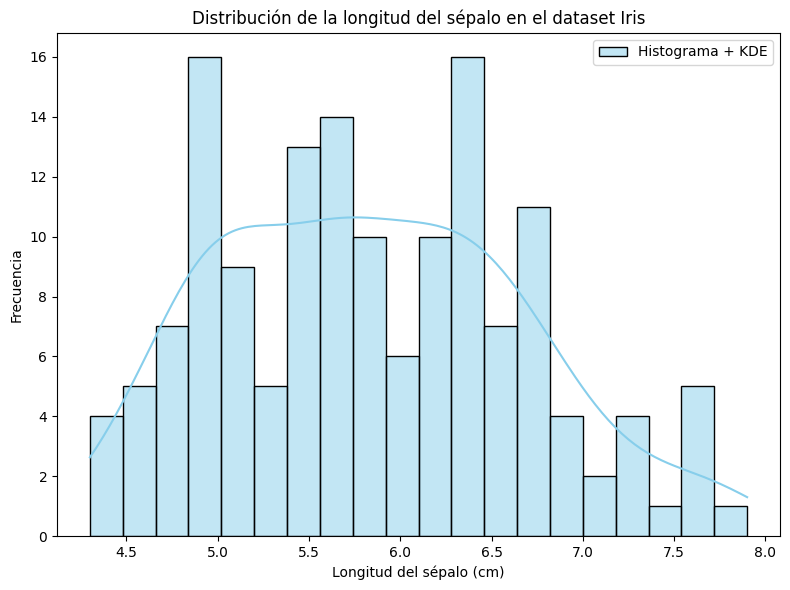

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Cargar el dataset
iris = sns.load_dataset("iris")
x = iris["sepal_length"].values

# Crear la gráfica
plt.figure(figsize=(8,6))
sns.histplot(x=x, bins=20, kde=True, color="skyblue", label="Histograma + KDE")

# Etiquetas y leyenda
plt.xlabel("Longitud del sépalo (cm)")
plt.ylabel("Frecuencia")
plt.title("Distribución de la longitud del sépalo en el dataset Iris")
plt.legend()
plt.tight_layout()
plt.show()


La distribución de la longitud del sépalo parece ser asimétrica ligeramente a la derecha, con la mayoría de los valores entre 5.0 y 6.0 cm.
Se observan algunos posibles valores atípicos por debajo de 4.5 cm y por encima de 7.5 cm, aunque no son extremos.
El KDE ayuda a visualizar que la distribución tiene una única moda principal.
Dado que es un conjunto multiclase (3 especies de iris), los extremos podrían deberse a una especie en particular.


# <span style="color:#2F749F;"><strong>Ejercicio 4: Z-Score</strong></span>

A partir de siguiente código:

1. Ajusta el código para mejorar la interpretación de la gráfica. Mínimo debes:
   - Indicar los nombres de los ejes
   - Incluir legenda para comprender lo que esté incluído en la gráfica
2. Generar máximo 5 líneas de análisis sobre lo que observas en términos de defición de atípicos sobre tú gráfica final

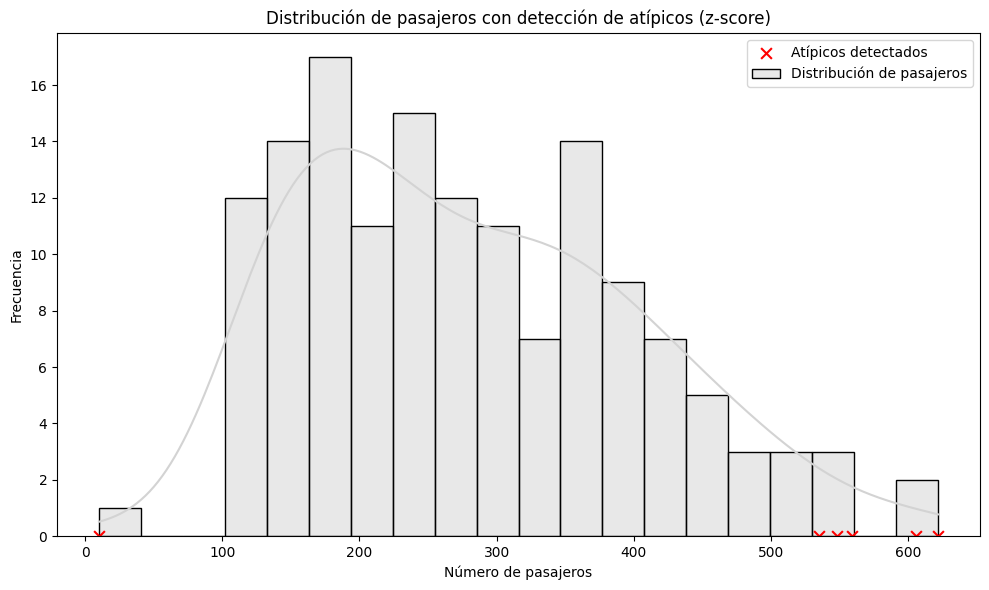

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore

# Cargar el dataset
flights = sns.load_dataset("flights")
x = flights["passengers"].values

# Agregar valores artificiales para simular atípicos
x = np.append(x, [10, 500])

# Calcular z-scores
z_scores = zscore(x)
data_b = np.abs(z_scores) > 2  # umbral para identificar atípicos

# Crear la gráfica
plt.figure(figsize=(10, 6))
sns.histplot(x=x, bins=20, kde=True, color="lightgray", label="Distribución de pasajeros")
plt.scatter(x[data_b], [0]*np.sum(data_b), color="red", s=60, label="Atípicos detectados", marker="x")

# Añadir etiquetas
plt.xlabel("Número de pasajeros")
plt.ylabel("Frecuencia")
plt.title("Distribución de pasajeros con detección de atípicos (z-score)")
plt.legend()
plt.tight_layout()
plt.show()


La distribución de pasajeros tiene una forma ligeramente asimétrica hacia la derecha.
Se han añadido dos valores extremos (10 y 500) que fueron correctamente detectados como atípicos con un umbral de |z| > 2.
Estos puntos se alejan claramente del patrón general del conjunto de datos original.
El uso de z-score es una técnica efectiva para identificar valores que se desvían significativamente de la media.

# <span style="color:#2F749F;"><strong>Ejercicio 5: K-means</strong></span>

A partir de siguiente código:

1. Ajusta el código para mejorar la interpretación de la gráfica. Mínimo debes:
   - Indicar los nombres de los ejes
   - Incluir legenda para comprender lo que esté incluído en la gráfica
2. Generar máximo 5 líneas de análisis sobre lo que observas en términos de defición de atípicos sobre tú gráfica final

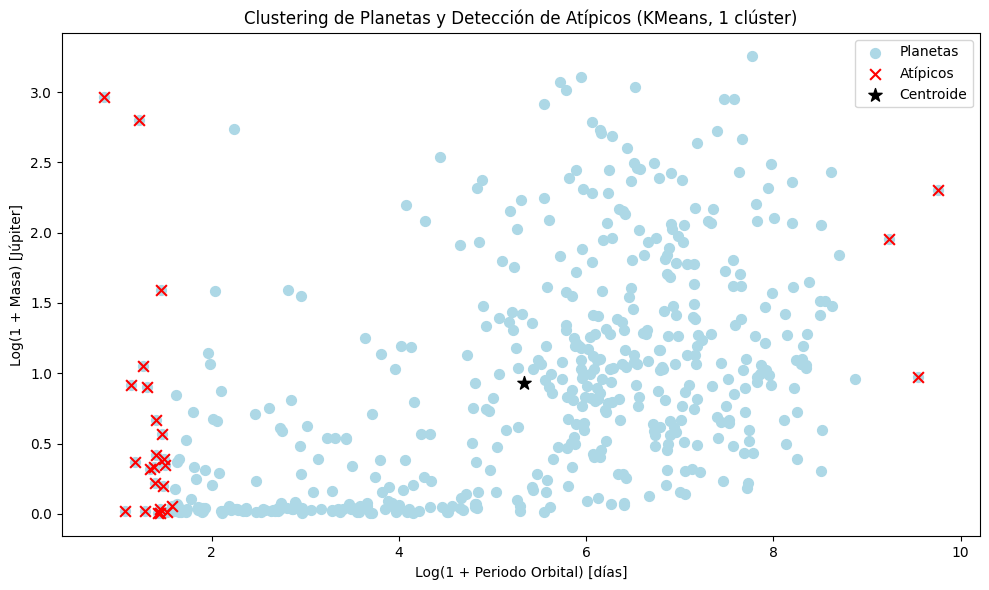

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np


planets = sns.load_dataset("planets").dropna(subset=["orbital_period", "mass"])

X = planets[["orbital_period", "mass"]].values
X = np.log1p(X)

kmeans = KMeans(n_clusters=1, random_state=42).fit(X)
centroid = kmeans.cluster_centers_[0]

distances = np.linalg.norm(X - centroid, axis=1)
threshold = np.percentile(distances, 95)
outliers = distances > threshold

# Graficar resultados
plt.figure(figsize=(10, 6))
plt.scatter(X[:,0], X[:,1], c="lightblue", s=50, label="Planetas")
plt.scatter(X[outliers,0], X[outliers,1], c="red", s=60, marker="x", label="Atípicos")
plt.scatter(centroid[0], centroid[1], c="black", s=100, marker="*", label="Centroide")

# Etiquetas
plt.xlabel("Log(1 + Periodo Orbital) [días]")
plt.ylabel("Log(1 + Masa) [Júpiter]")
plt.title("Clustering de Planetas y Detección de Atípicos (KMeans, 1 clúster)")
plt.legend()
plt.tight_layout()
plt.show()


El modelo KMeans con un solo clúster identifica un centroide promedio de los datos.
Aquellos planetas cuya masa y periodo orbital están más alejados de este centro se marcan como posibles atípicos.
Los atípicos están definidos aquí como los valores que se encuentran en el 5% más alejado del centroide según la distancia euclideana.
Estos valores pueden representar planetas extremadamente masivos o con órbitas muy largas.
El uso de log transforma la escala y permite observar patrones que de otro modo estarían ocultos por la dispersión.